In [1]:
# pip install scikit-learn
# requierment satisfied

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('Final Project Data.csv', index_col='Unnamed: 0')

In [8]:
data

,link,genre,date,day_data,shares,title_word_count,content_word_count,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity
0,http://mashable.com/2013/01/07/amazon-instant-...,entertainment,2013-01-07,monday,593,12.0,219.0,0.378636,-0.350000,-0.187500
1,http://mashable.com/2013/01/07/ap-samsung-spon...,business,2013-01-07,monday,711,9.0,255.0,0.286915,-0.118750,0.000000
2,http://mashable.com/2013/01/07/apple-40-billio...,business,2013-01-07,monday,1500,9.0,211.0,0.495833,-0.466667,0.000000
3,http://mashable.com/2013/01/07/astronaut-notre...,entertainment,2013-01-07,monday,1200,9.0,531.0,0.385965,-0.369697,0.000000
4,http://mashable.com/2013/01/07/att-u-verse-apps/,technology,2013-01-07,monday,505,13.0,1072.0,0.411127,-0.220192,0.136364
...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,technology,2014-12-31,wednesday,1800,11.0,346.0,0.333791,-0.260000,0.000000
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,social media,2014-12-31,wednesday,1900,12.0,328.0,0.374825,-0.211111,1.000000
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,lifestyle,2014-12-31,wednesday,1900,10.0,442.0,0.307273,-0.356439,0.136364
39642,http://mashable.com/2014/12/27/ukraine-blasts/,world,2014-12-31,wednesday,1100,6.0,682.0,0.236851,-0.205246,0.000000


## Discretization

In [9]:
# Define the thresholds and corresponding labels
thresholds = [0, 500, 10000, 100000, float('inf')]
labels = ['low', 'medium', 'high', 'viral']

In [10]:
data['share_category'] = pd.cut(data['shares'], bins=thresholds, labels=labels, right=False)

In [11]:
print(data['share_category'].value_counts())

medium    36355
high       2157
low        1074
viral        58
Name: share_category, dtype: int64


In [12]:
word_count_thresholds = [0, 200, 500, 800, float('inf')]
word_count_labels = ['very short', 'short', 'medium', 'long']

In [13]:
data['word_count_category'] = pd.cut(data['content_word_count'], bins=word_count_thresholds, labels=word_count_labels, right=False)

In [14]:
print(data['word_count_category'].value_counts())

short         16690
long           8137
medium         8020
very short     6797
Name: word_count_category, dtype: int64


In [18]:
data.columns

Index(['link', 'genre', 'date', 'day_data', 'shares', 'title_word_count',
       'content_word_count', 'avg_positive_polarity', 'avg_negative_polarity',
       'title_sentiment_polarity', 'share_category', 'word_count_category'],
      dtype='object')

## Encoding

In [19]:
data.dtypes

link                          object
genre                         object
date                          object
day_data                      object
shares                         int64
title_word_count             float64
content_word_count           float64
avg_positive_polarity        float64
avg_negative_polarity        float64
title_sentiment_polarity     float64
share_category              category
word_count_category         category
dtype: object

In [20]:
num_atr = ['shares', 'title_word_count','content_word_count', 'avg_positive_polarity', 'avg_negative_polarity', 'title_sentiment_polarity']
class_atr = ['share_category', 'word_count_category']

In [21]:
data_normalized = data.copy()

In [22]:
scaler = StandardScaler()
data_normalized[num_atr] = scaler.fit_transform(data_normalized[num_atr])

In [23]:
print(data_normalized)

                                                    link           genre  \
0      http://mashable.com/2013/01/07/amazon-instant-...   entertainment   
1      http://mashable.com/2013/01/07/ap-samsung-spon...        business   
2      http://mashable.com/2013/01/07/apple-40-billio...        business   
3      http://mashable.com/2013/01/07/astronaut-notre...   entertainment   
4       http://mashable.com/2013/01/07/att-u-verse-apps/      technology   
...                                                  ...             ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...      technology   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...    social media   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...       lifestyle   
39642     http://mashable.com/2014/12/27/ukraine-blasts/           world   
39643  http://mashable.com/2014/12/27/youtube-channel...   entertainment   

             date   day_data    shares  title_word_count  content_word_count  \
0      

In [35]:
data_normalized.to_csv('Final Project Data Normalized.csv')

## One-Hot Encoding

In [24]:
cat_atr = ['genre','day_data']    # link and date not included as they are unique for each row so it would create 40k columns for each unique value
class_atr = ['share_category', 'word_count_category']

In [25]:
data_encoded = data.copy()
data_encoded = pd.get_dummies(data_encoded, columns=cat_atr)

In [26]:
print(data_encoded)

                                                    link        date  shares  \
0      http://mashable.com/2013/01/07/amazon-instant-...  2013-01-07     593   
1      http://mashable.com/2013/01/07/ap-samsung-spon...  2013-01-07     711   
2      http://mashable.com/2013/01/07/apple-40-billio...  2013-01-07    1500   
3      http://mashable.com/2013/01/07/astronaut-notre...  2013-01-07    1200   
4       http://mashable.com/2013/01/07/att-u-verse-apps/  2013-01-07     505   
...                                                  ...         ...     ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...  2014-12-31    1800   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...  2014-12-31    1900   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...  2014-12-31    1900   
39642     http://mashable.com/2014/12/27/ukraine-blasts/  2014-12-31    1100   
39643  http://mashable.com/2014/12/27/youtube-channel...  2014-12-31    1300   

       title_word_count  content_word_c

## Train-Test slpit

In [27]:
y = data[class_atr]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.3, random_state=123)

In [29]:
print(X_train)

                                                    link        date  shares  \
10085  http://mashable.com/2013/07/17/speakers-for-ip...  2013-07-17     896   
37629  http://mashable.com/2014/11/24/super-mario-wor...  2014-11-26     968   
36744  http://mashable.com/2014/11/11/vanessa-mae-win...  2014-11-13     903   
32045  http://mashable.com/2014/09/03/u-s-justice-dep...  2014-09-04     696   
6569   http://mashable.com/2013/05/08/oscar-de-la-ren...  2013-05-08     752   
...                                                  ...         ...     ...   
7763   http://mashable.com/2013/06/02/social-media-ga...  2013-06-02   17100   
15377  http://mashable.com/2013/10/30/facebook-teen-u...  2013-10-30    2000   
17730    http://mashable.com/2013/12/18/cholesterol-app/  2013-12-18    2700   
28030  http://mashable.com/2014/06/30/supreme-court-c...  2014-06-30    4000   
15725  http://mashable.com/2013/11/06/kony-hunt-crowd...  2013-11-06    5700   

       title_word_count  content_word_c

In [30]:
print(X_test)

                                                    link        date  shares  \
3847   http://mashable.com/2013/03/14/watch-astronaut...  2013-03-14     818   
5737   http://mashable.com/2013/04/22/recycle-old-sma...  2013-04-22    3300   
9417   http://mashable.com/2013/07/04/magna-carta-hol...  2013-07-04     134   
33967            http://mashable.com/2014/10/03/bad-usb/  2014-10-03    2200   
26130  http://mashable.com/2014/05/30/va-secretary-sh...  2014-05-31    1800   
...                                                  ...         ...     ...   
23178  http://mashable.com/2014/04/08/oakland-interna...  2014-04-08    1700   
8361        http://mashable.com/2013/06/13/facebook-rss/  2013-06-13     958   
15071       http://mashable.com/2013/10/24/fish-shaming/  2013-10-24     597   
21469  http://mashable.com/2014/03/06/japan-bitcoin-n...  2014-03-06    2200   
20337  http://mashable.com/2014/02/12/republicans-fak...  2014-02-12    1100   

       title_word_count  content_word_c

In [31]:
print(y_train,y_test)

      share_category word_count_category
10085         medium               short
37629         medium               short
36744         medium          very short
32045         medium                long
6569          medium               short
...              ...                 ...
7763            high          very short
15377         medium                long
17730         medium              medium
28030         medium               short
15725         medium                long

[27750 rows x 2 columns]       share_category word_count_category
3847          medium              medium
5737          medium              medium
9417             low               short
33967         medium                long
26130         medium          very short
...              ...                 ...
23178         medium          very short
8361          medium          very short
15071         medium               short
21469         medium              medium
20337         medium           

In [33]:
# pip install seaborn
# requirement satisfied

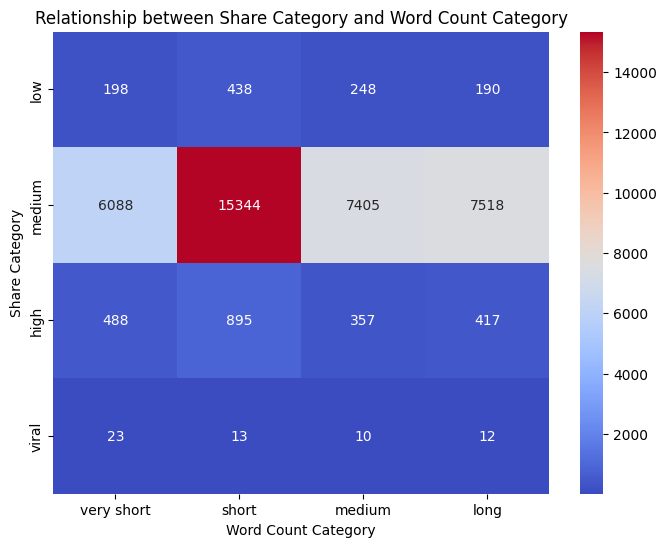

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'share_category' and 'word_count_category'

# Calculate the cross-tabulation (frequency) between 'share_category' and 'word_count_category'
cross_tab = pd.crosstab(data['share_category'], data['word_count_category'])

# Create a heatmap using the cross-tabulation data
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Relationship between Share Category and Word Count Category')
plt.xlabel('Word Count Category')
plt.ylabel('Share Category')
plt.show()


In [34]:
data_encoded.to_csv('Final Project Data Encoded.csv')